In [1]:
import pandas as pd
import numpy as np

In [2]:
# Add the parent directory to the system path 
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
# importing modules from scripts 
from scripts.preprocessing import *
from scripts.logger import setup_logger

In [4]:
#logger
logger = setup_logger('preprocess_logger', '../logs/cleaning.log')

In [5]:
# loading data 
df_train = pd.read_csv('../data/train.csv',low_memory=False, index_col=False)
df_store = pd.read_csv('../data/store.csv',low_memory=False, index_col=False)
df_test=pd.read_csv('../data/test.csv', low_memory=False, index_col=False)

In [6]:
# log the data loading
logger.info('Training, test, and store data loaded.')

In [7]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [8]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


### General Stastics 

In [10]:
print ('shape of training data:' ,df_train.shape)
print ('shape of store data:' ,df_store.shape)
print('shape of test data:',df_test.shape)

shape of training data: (1017209, 9)
shape of store data: (1115, 10)
shape of test data: (41088, 8)


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [12]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [13]:
# Merge train data with store data
df = pd.merge(df_train, df_store, on='Store', how='left')
logger.info('training data merged with store data')

In [14]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [16]:
# summary of numerical data 
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [17]:
df_test.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [18]:
# shape of the merged data
print('shape of the merged dataset:',df.shape)

shape of the merged dataset: (1017209, 18)


the merged train and store data contains 1017209 rows and 18 columns

In [19]:
# check for columns data types
df.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [20]:
df_test.dtypes

Id                 int64
Store              int64
DayOfWeek          int64
Date              object
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object

In [21]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [22]:
df_test.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

### Data Quality Assessment
 check for missing values, duplicates, and calculate the percentage of missing data for each column.

In [23]:
# Check for missing values
print(df.isnull().sum())

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64


In [24]:
print(df_test.isnull().sum())

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64


In [25]:
# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [26]:
print(f"Number of duplicate rows:{df_test.duplicated().sum()}")

Number of duplicate rows:0


In [27]:
# percentage of missing values 
calculate_missing_percentage(df)

The dataset has 11.87% missing values.


In [28]:
calculate_missing_percentage(df_test)

The dataset has 0.0% missing values.


The below table presents a summary of missing data for various columns in a dataset.

In [29]:
# Data Quality Assessment. # total missing values and it's percentage  in merged train and store data 
missing_data = check_missing_values(df)
missing_data

,Missing Values,% of Total Values,Data type
Promo2SinceWeek,508031,49.94,float64
PromoInterval,508031,49.94,object
Promo2SinceYear,508031,49.94,float64
CompetitionOpenSinceYear,323348,31.79,float64
CompetitionOpenSinceMonth,323348,31.79,float64
CompetitionDistance,2642,0.26,float64
DayOfWeek,0,0.00,int64
Store,0,0.00,int64
Date,0,0.00,object
Sales,0,0.00,int64


The dataframe contains 12 columns.6 columns have missing values.
- The first 3 columns have equal number of missing values.
- The next 2 columns have equal number of missing values.

In [30]:
# Data Quality Assessment. # total missing values and it's percentage in test data
test_data = check_missing_values(df_test)
test_data

,Missing Values,% of Total Values,Data type
Open,11,0.03,float64
Id,0,0.00,int64
DayOfWeek,0,0.00,int64
Store,0,0.00,int64
Date,0,0.00,object
Promo,0,0.00,int64
StateHoliday,0,0.00,object
SchoolHoliday,0,0.00,int64


The dataframe contains 8 columns.
columns 'Open' have 11 missing values.

### Handling Missing values 

These columns['Promo2SinceWeek', 'Promo2SinceYear','PromoInterval'] refer to promotional events, and missing values may indicate stores that never had a promotion.

Handling: Impute the missing values with 0 for the numeric columns['Promo2SinceWeek','Promo2SinceYear'] to reflect the absence of promotion for those stores and also 0 for ['PromoInterval'] to indicate stores that do not participate in promotions during any months.

In [31]:
df['Promo2SinceWeek'] = df['Promo2SinceWeek'].fillna(0)
df['Promo2SinceYear'] = df['Promo2SinceYear'].fillna(0)
df['PromoInterval'] = df['PromoInterval'].fillna(0)
logger.info('from the merged data  rows with missing values are filled with 0')

for columns [CompetitionOpenSinceYear, CompetitionOpenSinceMonth] the missing values indicate that no competition was present near the store.

Handling: Impute the missing values with 0 to signify that competition was not open during those periods for certain stores.

In [32]:
df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].fillna(0)
df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].fillna(0)
logger.info('from the merged data rows  missing rows that indicate no competion are filled with 0')


The column ['CompetitionDistance'] represents the distance to the nearest competitor. missing values mean no competitor is nearby

Handling: Fill with the median competition distance since missing values might represent unknown distances rather than a lack of competitors. I use median as it is robust to outliers.


In [33]:
median_distance = df['CompetitionDistance'].median()
df['CompetitionDistance'] = df['CompetitionDistance'].fillna(median_distance)
logger.info(' missing values from CompetionDistance coulumns is filled with most frequent value')

In [34]:
df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

for 'Open' column in test data fill the missing values with the most frequent value (either 0 or 1)

In [35]:
# find the most frequent value(mode) in the 'Open' column and replace the missing values 
mode_open = df_test['Open'].mode()[0]
df_test['Open'] = df_test['Open'].fillna(mode_open)

In [36]:
calculate_missing_percentage(df_test)
calculate_missing_percentage(df)

The dataset has 0.0% missing values.
The dataset has 0.0% missing values.


no missing values on both the test dataset and the merged train and store dataset 

In [37]:
# change Date type from object to datetime
df['Date'] = pd.to_datetime(df["Date"])
df_test['Date'] = pd.to_datetime(df_test["Date"])

### Check for Outliers

In [38]:
columns = ['Store','Sales', 'Customers', 'Date', 'CompetitionDistance']

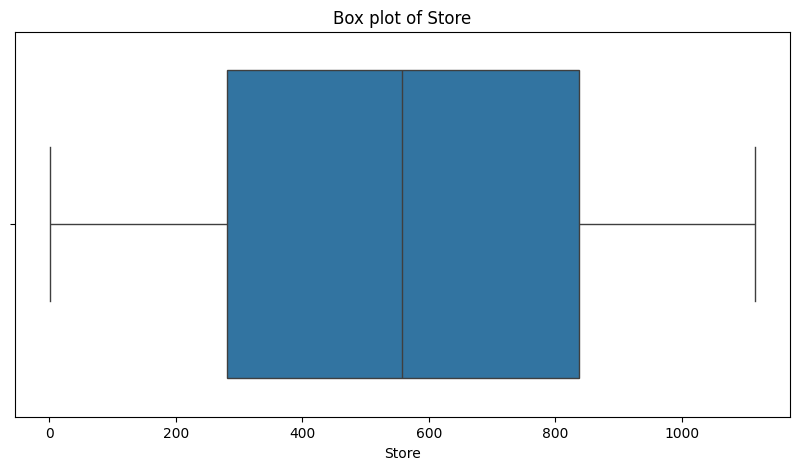

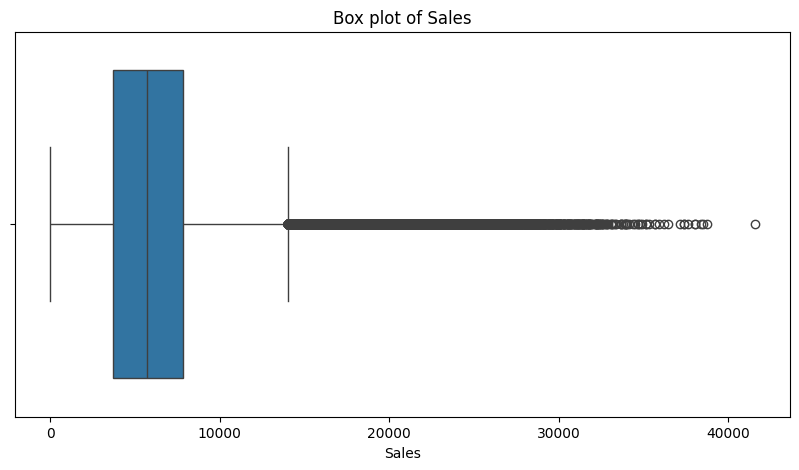

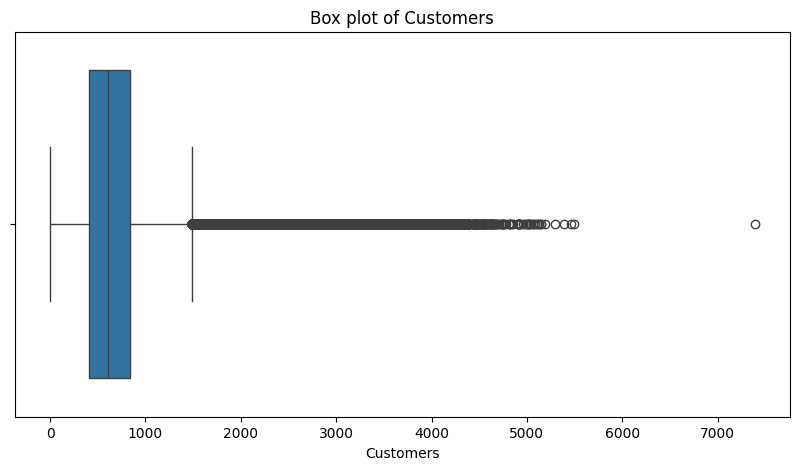

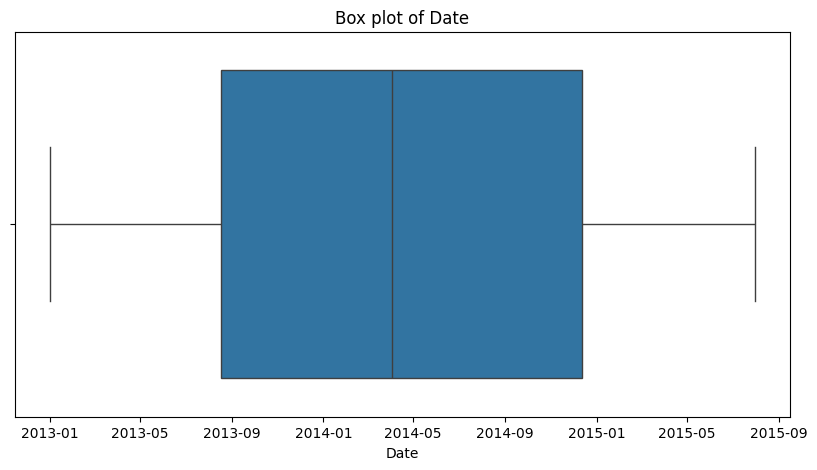

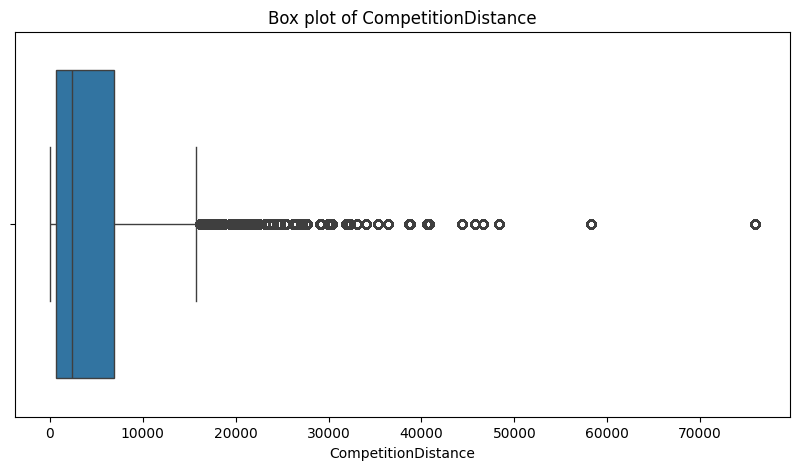

In [39]:
# outlier plot for each variable in columns of merged dataset 
cols = df[columns]
outlier_box_plots(cols)

In [40]:
# save the cleaned data's
df.to_csv('../data/clean/train.csv', index=False)
df_test.to_csv('../data/clean/test.csv', index=False)

OSError: Cannot save file into a non-existent directory: '..\data\clean'